In [ ]:
import utils
from load_dataset import load_dataset, feature_extraction

data_directory = "/Users/nepal/Documents/synapthesis/synData6July"
lotti_fn = "export_lotti_veneto_2016_2018_giulio_v2.csv"
vincitori_fn = "export_vincitori_veneto_2016_2018_giulio_v2.csv"
procedura_fn = "tipi_procedure.csv"

df = load_dataset(data_directory, lotti_fn, vincitori_fn, procedura_fn)
df = feature_extraction(df)


In [9]:
# drop columns
df = df.drop(columns=["id_pa", "data_fine", "id_forma_giuridica_pa", 
            "id_be", "id_forma_giuridica_be", "uber_forma_giuridica_be", "procedura", "tipo_procedura", 
            "med_yearly_n_contr_pa", "med_yearly_n_contr_be", "id_lsf"])

# convert uber_forma_giurica_pa with label encoding to integers
uber_forma_giuridica_pa_names = dict()
for i, forma in enumerate(set(df.uber_forma_giuridica_pa)):
    uber_forma_giuridica_pa_names[forma] = i

df = df.replace(uber_forma_giuridica_pa_names)

In [10]:
import numpy as np
# convert to log10
importo_cols = ["importo", "median_expenditure_pa", "median_revenue_be", "contr_med_pa","contr_med_be"]
df.loc[:, importo_cols] = np.log10(df[importo_cols])

In [13]:
df

,id_scelta_contraente,importo,data_inizio,uber_forma_giuridica_pa,cpv,median_expenditure_pa,median_revenue_be,contr_med_pa,contr_med_be,durata,day_of_year_sin,day_of_year_cos
0,23,3.587935,2017-03-09,6,63,5.331857,5.031219,2.648950,3.385964,0 days,0.920971,0.389630
1,23,3.363612,2017-08-21,6,22,5.530828,5.158936,2.695666,2.557086,0 days,-0.763889,-0.645348
2,23,2.193125,2016-12-19,3,22,5.571842,6.321481,2.895494,2.340127,12 days,-0.188227,0.982126
3,23,2.245513,2016-08-05,6,80,4.793365,3.408410,2.507856,2.431364,0 days,-0.573772,-0.819015
4,23,2.849984,2018-05-31,8,33,8.007348,5.391426,2.886491,2.890427,0 days,0.516062,-0.856551
...,...,...,...,...,...,...,...,...,...,...,...,...
755752,23,4.296665,2016-06-06,9,45,6.910616,4.457882,3.082520,3.643453,56 days,0.409356,-0.912375
755753,23,3.106531,2017-05-26,6,63,4.807155,4.219859,2.603686,3.322116,0 days,0.587785,-0.809017
755754,23,3.340841,2018-02-15,1,42,7.655586,3.916559,2.978719,3.615529,43 days,0.711657,0.702527
755755,23,1.424228,2016-12-02,3,32,5.914559,6.056023,3.203577,2.777970,29 days,-0.463550,0.886071


In [17]:
df.loc[:, "durata"] = df.durata.dt.days

# Unsupervised anomaly detection models
1. Local Outlier Factor (non-parametric)
2. Robust Subspace Recovery layer Auto Encoder (parametric)
3. Self-Organizing Maps (?)
4. Isolation Forest (parametric)
5. One-class SVM (parametric?)
6. KNN w/ Mahalanobis distance (non-paramtric)
7. Extreme Value Theory (?)


In [18]:
# Isolation Forest

from sklearn.ensemble import IsolationForest

forest = IsolationForest(random_state=1)
labels = forest.fit_predict(df.drop(columns=["data_inizio"]))


In [22]:
sum(labels==-1)

126750

<AxesSubplot:xlabel='median_revenue_be', ylabel='importo'>

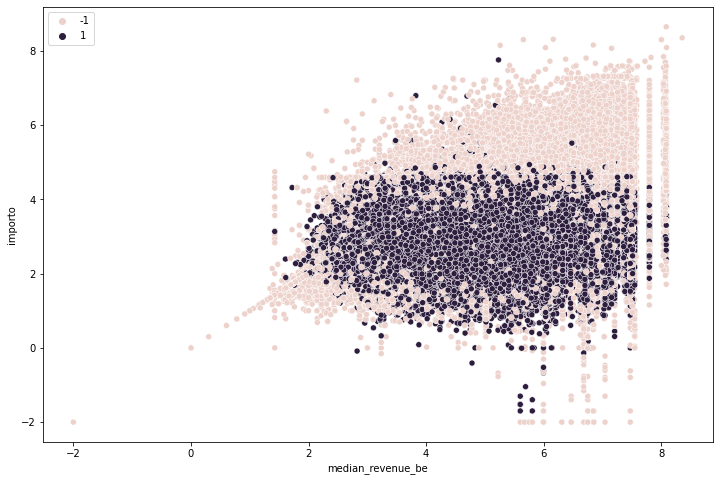

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.scatterplot(x="median_revenue_be", y="importo", data=df, hue=labels)


quindi sul dataset intero non funziona

In [ ]:
data = df[(df.cpv == 33) & df.id_scelta_contraente == 1 ]